In [2]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.010255948 0.2320284


(array([ 3.,  0.,  0.,  2., 16., 34., 65., 76., 67., 25.]),
 array([-1.1239702 , -0.969552  , -0.81513375, -0.6607156 , -0.50629735,
        -0.35187918, -0.19746098, -0.04304279,  0.11137541,  0.2657936 ,
         0.4202118 ], dtype=float32),
 <a list of 10 Patch objects>)

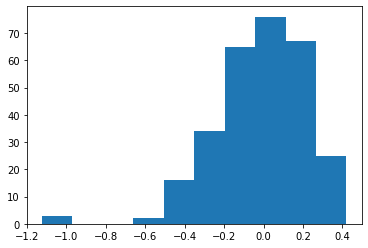

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

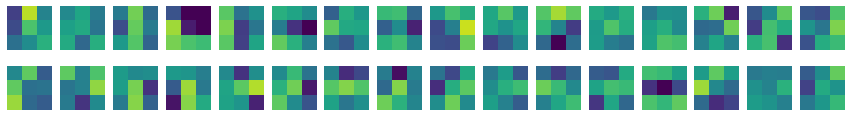

In [8]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [11]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0011371432 0.080684185


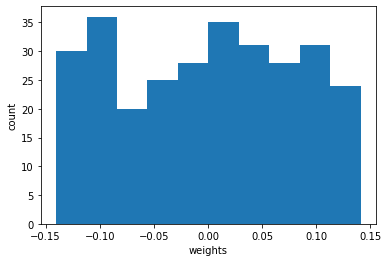

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

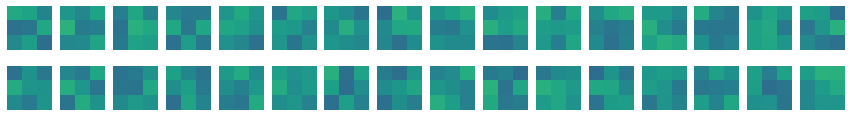

In [15]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [16]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [17]:
conv_acti = keras.Model(model.input, model.layers[0].output)

4431872/4422102 [==============================] - 0s 0us/step


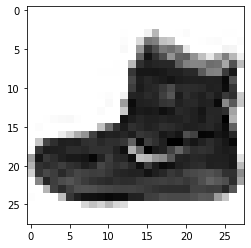

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [19]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [20]:
print(feature_maps.shape)

(1, 28, 28, 32)


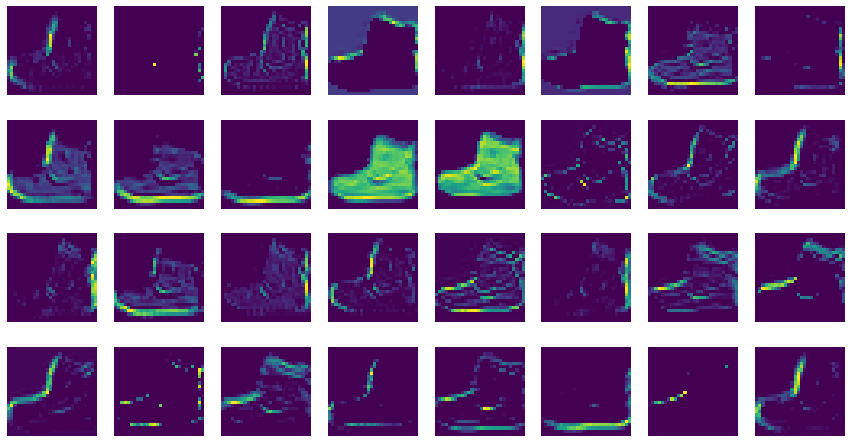

In [24]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()

In [25]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [26]:
feature2_maps = conv2_acti.predict(inputs)

In [27]:
print(feature2_maps.shape)

(1, 14, 14, 64)


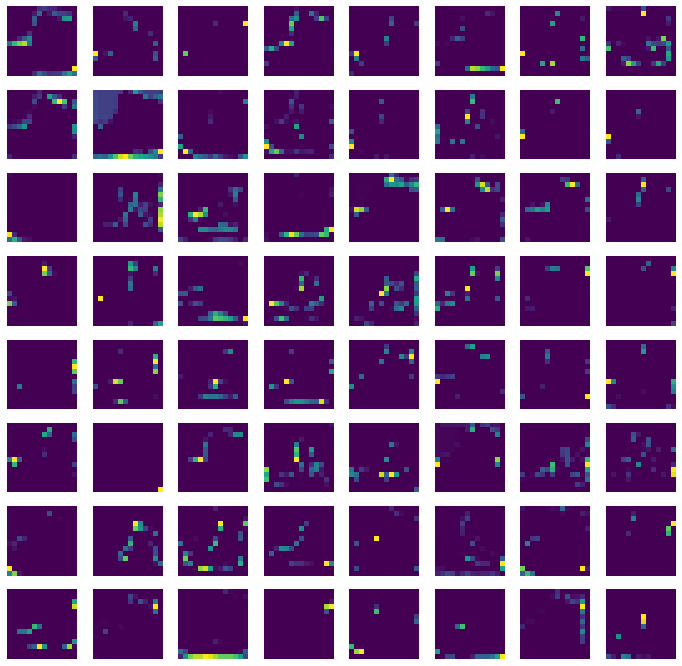

In [28]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature2_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()

In [31]:
model.layers[2]